# Dealing with Categorical Variables - Lab done by `Eugene Maina`

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [52]:
# Your code here - load the dataset
import pandas as pd
data = pd.read_csv('ames.csv', index_col=0)


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [53]:
# Your code here
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [54]:
# Your code here - drop columns with missing data
data = data.dropna(axis=1, how='any')

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

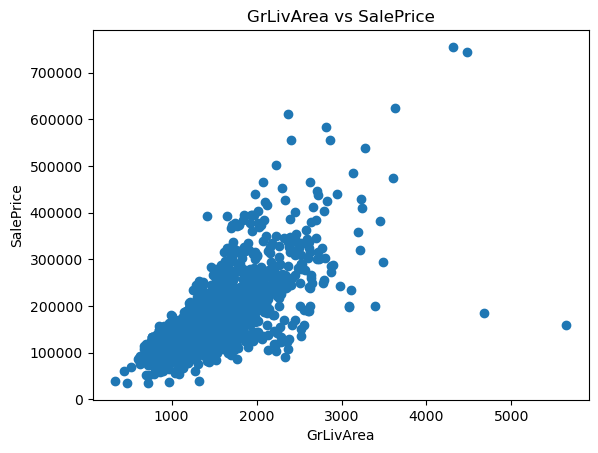

In [55]:
# Your code here - continuous numeric predictor
"""The continous numerical predictor is GrLivArea."""
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()


### Discrete Numeric Predictor

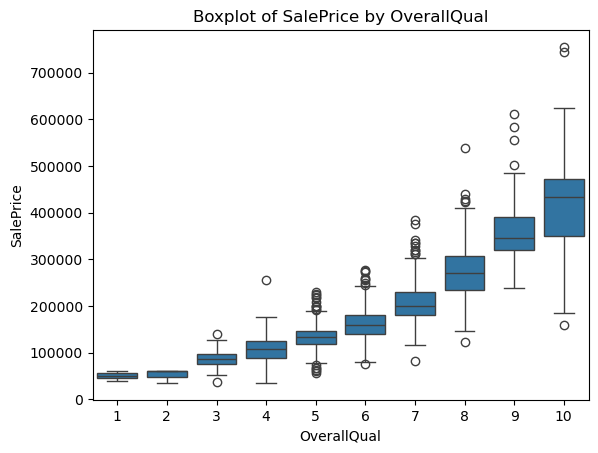

In [56]:
# Your code here - discrete numeric predictor
"""The discrete numerical predictor is OverallQual."""
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Boxplot of SalePrice by OverallQual')
plt.show()


### String Categorical Predictor

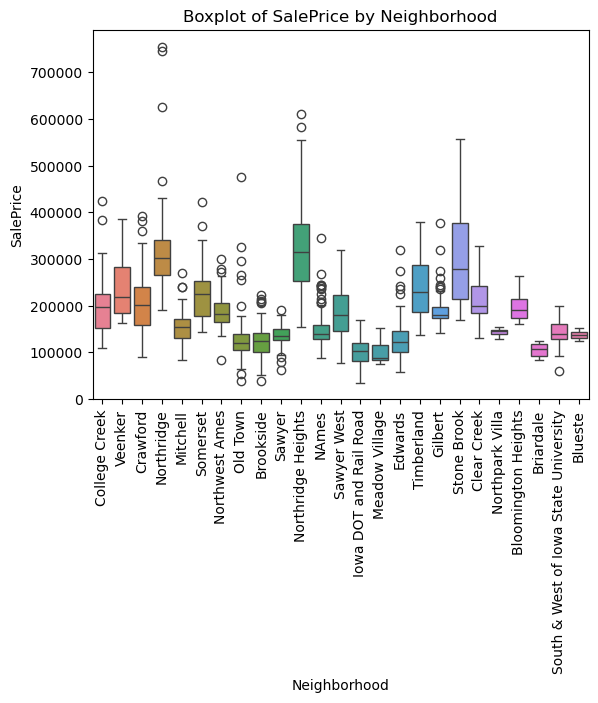

In [57]:
# Your code here - string categorical predictor
"""The string categorical predictor is Neighborhood."""
name_replacement_dict = {
    'Blmngtn': 'Bloomington Heights',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}
data['Neighborhood'] = data['Neighborhood'].replace(name_replacement_dict)
sns.boxplot(x='Neighborhood', y='SalePrice', data=data, hue='Neighborhood', legend=False)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('Boxplot of SalePrice by Neighborhood')
plt.xticks(rotation=90)
plt.show()


### Discrete Categorical Predictor

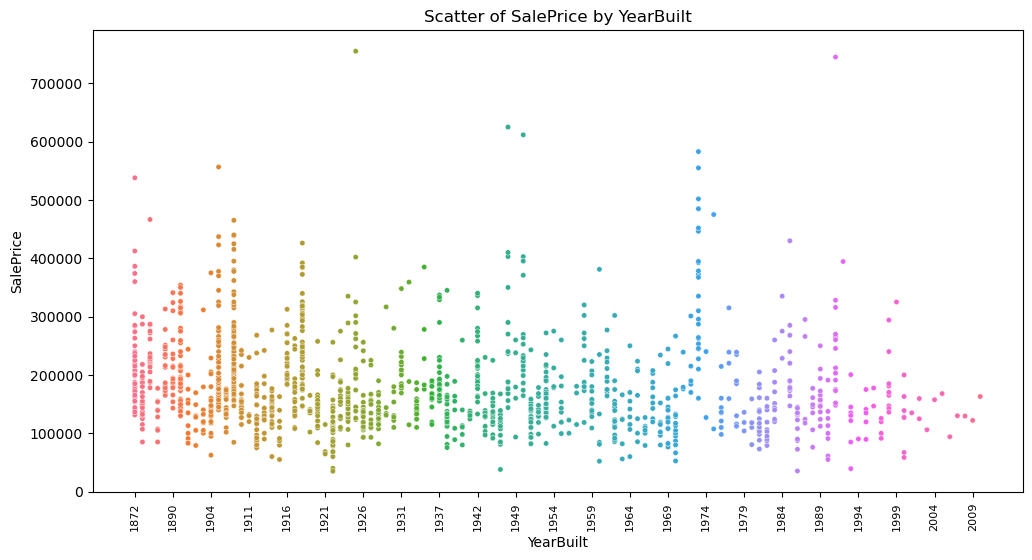

In [58]:
# Your code here - discrete categorical predictor
"""The discrete categorical predictor is YearBuilt."""
data['YearBuilt'] = data['YearBuilt'].astype(str)
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data, hue='YearBuilt', legend=False, s=15)
# Sort the x-axis values and make them neater
sorted_years = sorted(data['YearBuilt'].unique(), key=int)
ax.set_xticks(range(0, len(sorted_years), 5))
ax.set_xticklabels(sorted_years[::5], rotation=90, fontsize=8)
plt.ylabel('SalePrice')
plt.title('Scatter of SalePrice by YearBuilt')
plt.xticks(rotation=90)
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [59]:
# Your code here - prepare X and y, including one-hot encoding
y = data['SalePrice']
X = data[['GrLivArea', 'OverallQual', 'Neighborhood', 'YearBuilt']]

# One-hot encoding Neighborhood
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True) 

# Convert YearBuilt to numeric
X['YearBuilt'] = pd.to_numeric(X['YearBuilt'])  

# Converting boolean columns to integers
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   GrLivArea                                           1460 non-null   int64
 1   OverallQual                                         1460 non-null   int64
 2   YearBuilt                                           1460 non-null   int64
 3   Neighborhood_Blueste                                1460 non-null   int32
 4   Neighborhood_Briardale                              1460 non-null   int32
 5   Neighborhood_Brookside                              1460 non-null   int32
 6   Neighborhood_Clear Creek                            1460 non-null   int32
 7   Neighborhood_College Creek                          1460 non-null   int32
 8   Neighborhood_Crawford                               1460 non-null   int32
 9   Neighborhood_Edwards    

In [60]:
# Your answer here - which category or categories were dropped?
print(f"The category that was dropped is the first category of Neighborhood, which is 'Blmngtn' (Bloomington Heights)")


The category that was dropped is the first category of Neighborhood, which is 'Blmngtn' (Bloomington Heights)


In [61]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
X = sm.add_constant(X)  # Add a constant term to the predictor matrix

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     201.8
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        06:05:49   Log-Likelihood:                -17398.
No. Observations:                1460   AIC:                         3.485e+04
Df Residuals:                    1432   BIC:                         3.500e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [62]:
# Sorting by coefficents
print(model.params.sort_values(ascending=False))  # Sort parameters in descending order  




Neighborhood_Stone Brook                               73740.306718
Neighborhood_Northridge Heights                        72515.517771
Neighborhood_Northridge                                68105.354030
Neighborhood_Veenker                                   55529.958572
Neighborhood_Crawford                                  38446.487896
Neighborhood_Clear Creek                               37533.318249
Neighborhood_Timberland                                34408.695968
OverallQual                                            19104.372907
Neighborhood_Somerset                                  17857.839377
Neighborhood_Brookside                                 13976.557022
Neighborhood_College Creek                             13365.870170
Neighborhood_Sawyer                                    12382.784579
Neighborhood_NAmes                                     11134.885203
Neighborhood_Mitchell                                   9056.307566
Neighborhood_Northwest Ames                     

In [63]:
# P values
print(model.pvalues.sort_values(ascending=True).round(3))  # Round to 3 decimal places 

GrLivArea                                             0.000
OverallQual                                           0.000
Neighborhood_Northridge Heights                       0.000
Neighborhood_Stone Brook                              0.000
Neighborhood_Northridge                               0.000
const                                                 0.000
YearBuilt                                             0.000
Neighborhood_Veenker                                  0.000
Neighborhood_Crawford                                 0.001
Neighborhood_Clear Creek                              0.001
Neighborhood_Timberland                               0.001
Neighborhood_Briardale                                0.015
Neighborhood_Somerset                                 0.066
Neighborhood_College Creek                            0.155
Neighborhood_Brookside                                0.216
Neighborhood_Sawyer                                   0.232
Neighborhood_NAmes                      

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

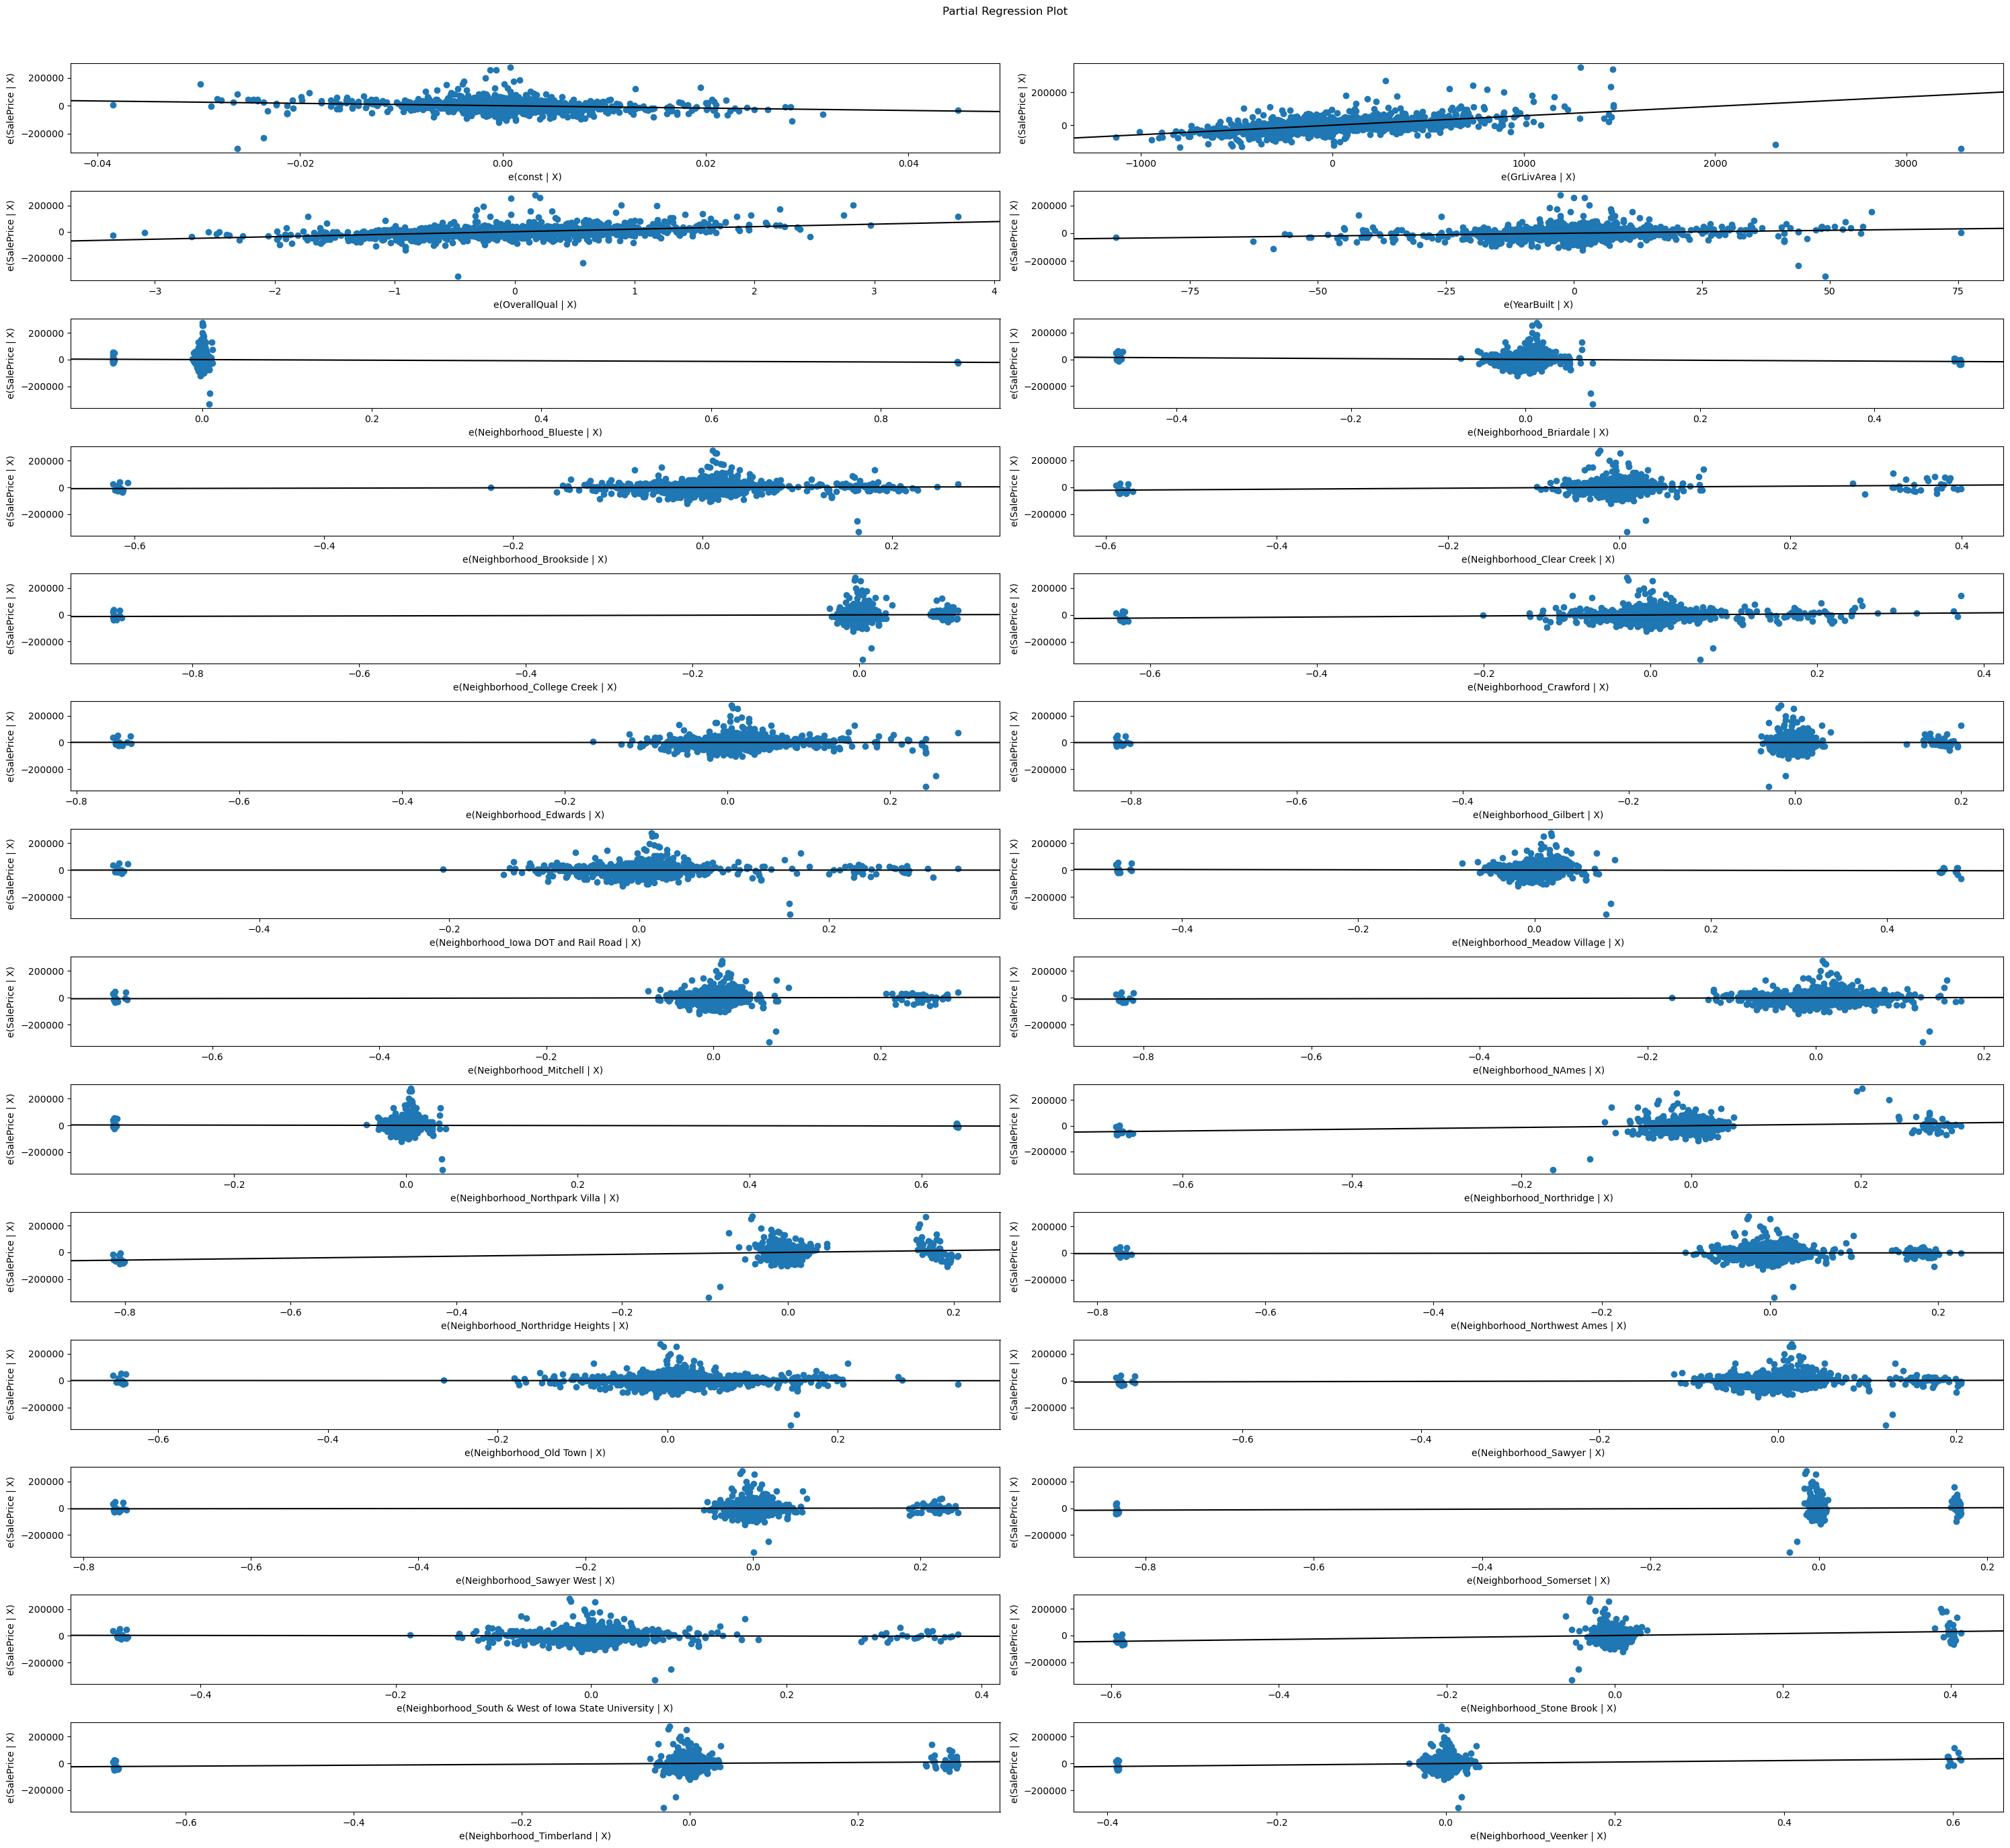

In [64]:
# Your code here - create partial regression plots

# Partial regression plots
sm.graphics.plot_partregress_grid(model, fig=plt.figure(figsize=(30, 28)))
plt.show()
plt.savefig('partial_regression_plots.png', dpi=300, bbox_inches='tight')
plt.close()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [65]:
# Your code here - calculate an error-based metric
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}, MAE: {mae}")  # Print RMSE and MAE

RMSE: 38524.271960588114, MAE: 24126.12817975828


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [68]:
# Your answer here
print(f'The model shows that the overall quality of the house, the size of the living area, and the year the house was built are strong predictors of the sale price.\nAdditionally, certain neighborhoods, such as Stone Brook and Northridge Heights, significantly increase the sale price, while others, like Briardale, have a negative impact.\nThe model explains about 78.8% of the variation in sale prices, which indicates a good fit.\nHowever, there is still room for improvement, as the RMSE of approximately $38,572 suggests some prediction errors.')

The model shows that the overall quality of the house, the size of the living area, and the year the house was built are strong predictors of the sale price.
Additionally, certain neighborhoods, such as Stone Brook and Northridge Heights, significantly increase the sale price, while others, like Briardale, have a negative impact.
The model explains about 78.8% of the variation in sale prices, which indicates a good fit.
However, there is still room for improvement, as the RMSE of approximately $38,572 suggests some prediction errors.


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [67]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.